In [45]:
import re
import os
import copy
import matplotlib.pyplot as plt

### Build

### Run

###### Running the cell below will generate the sensorfusion.txt file, which is needed for the rest of the analysis. I have included the file already; so, I made this a markup cell. If you have set up the environment, and wish to run it, please convert to code cell.

import subprocess
command = "D:/code/C++/RT-Cadmium-FDD/top_model/main.exe"
completed_process = subprocess.run(command, shell=False, capture_output=True, text=True)
#print(completed_process.stdout)


### Read from file

In [47]:
fileName = "SensorFusion.txt"

with open(fileName, "r") as f:
    lines = f.readlines()
    
faults = {"{1}": "A1", "{2}": "B1", "{3}": "C1", "{4}": "D1", "{1, 2}": "A1B1", "{1, 3}": "A1C1", "{1, 4}": "A1D1", "{2, 3}": "B1C1", "{3, 4}": "C1D1", }
pure_fault_dict = {'A1': 1, 'B1': 2, 'C1': 3, 'D1': 4}
fault_freq = {}

for key in faults.values():
    fault_freq[key] = 0
    
for line in lines:
    if (re.search("supervisor", line) == None):
        continue
        
    interest = re.findall("\{\d+[,]*\s*\d*\}", line)[0]
    fault_freq[faults[interest]] += 1
    
with open(fileName, "r") as f:
    output = f.read()
generators = {'A': 0, 'B': 0, 'C': 0, 'D': 0}

for key in generators.keys():
    generators[key] = len(re.findall("faultGen" + key, output))
    
values = list(fault_codes.values())
keys = list(fault_codes.keys())

NameError: name 'fault_codes' is not defined

In [59]:
generators
fault_freq

{'A1': 8,
 'B1': 45,
 'C1': 9,
 'D1': 13,
 'A1B1': 4,
 'A1C1': 2,
 'A1D1': 2,
 'B1C1': 5,
 'C1D1': 2}

In [ ]:
def sumFromSupervisor(code):
    '''
    Returns the number of times faults associated with a particular pure fault (the parameter) were output by the supervisor

    @param code: string
    @return int
    '''
    sum = 0
    
    for key, value in fault_freq.items():
        if code in key:
            sum += value;
            
    return sum;

### ANALYSIS / VERIFICATION

#### Definitions

**Pure Fault**: Faults from a single generator.  
**Compound Faults**: Faults formed from the combination of pure faults.

### Premise

Fault $A1$: Should have no discarded entry, because it has the highest priority  
Fault $B1$: Should have some discarded value, for the case $BD$, which is not available  
Fault $C1$: Higher percentage of discarded cases than $C$, because of its lower priority  
Fault $D1$: Highest percentage of discarded cases, because it has the lowest priority  

Generator $output_{A1} = n({A1}) + n({A1} \cap {B1}) + n({A1} \cap {C1}) + n({A1} \cap {D1}) + discarded_{A1}$  
Generator $output_{B1} = n({B1}) + n({A1} \cap {B1}) + n({B1} \cap {C1}) + discarded_{B1}$  
Generator $output_{C1} = n({C1}) + n({A1} \cap {C1}) + n({B1} \cap {C1}) + n({C1} \cap {D1}) + discarded_{C1}$  
Generator $output_{D1} = n({D1}) + n({A1} \cap {D1}) + n({C1} \cap {D1}) + discarded_{D1}$  

Where $discarded_{D1} \equiv 0$, because A has the highest priority  

The sole reason for the existence of a discarded $B1$ fault is the priority system. It happens at line $226$, time $00:00:05:580$, where fault generators $A1$ and $B1$ send their signals simultaneously, and state $A1$ alone gets set to true, because by the priority system, the external transition function returns immediately after the first loop it hits, which in this case, is the $A1$ loop. If you remove the return statements in the loops of the external transition function, all $B1$ faults are handled, and $discarded_{B1}$ becomes $0$.

### Discarded

In [48]:
discarded = {}
discarded['A'] = generators['A'] - sumFromSupervisor("A1")
discarded['B'] = generators['B'] - sumFromSupervisor("B1")
discarded['C'] = generators['C'] - sumFromSupervisor("C1")
discarded['D'] = generators['D'] - sumFromSupervisor("D1")
discarded

{'A': 0, 'B': 1, 'C': 2, 'D': 20}

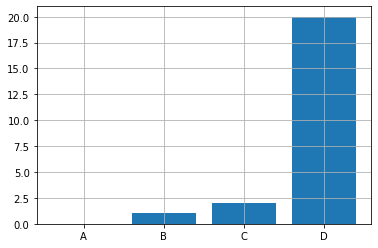

In [49]:
#plt.title('Discarded Bar')
plt.bar(discarded.keys(), discarded.values())
plt.grid()
#plt.show()
plt.savefig('discarded bar.png', format='png')

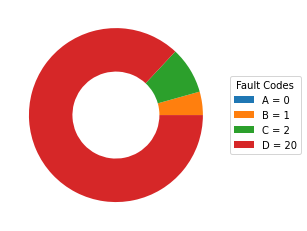

In [50]:
keys, values = list(discarded.keys()), list(discarded.values())
legend_keys = copy.copy(keys)

for i in range(len(keys)):
     legend_keys[i] = str(legend_keys[i]) + " = " + str(values[i])

# Remove wedgeprops to make pie
wedges, texts = plt.pie(values, textprops=dict(color="w"), wedgeprops=dict(width=0.5))
plt.legend(wedges, legend_keys,
          title="Fault Codes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#plt.title("Discarded Pie")
#plt.show()
plt.savefig('discard pie.png', format='png')

### Single Run

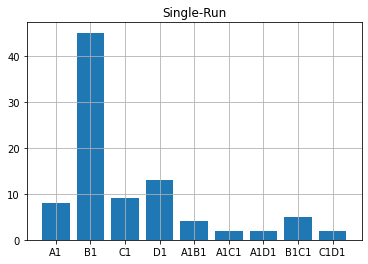

In [58]:
chart_data = copy.copy(fault_freq)
values = list(chart_data.values())
keys = list(chart_data.keys())

plt.title('Single-Run')
plt.bar(keys, values)
plt.grid()
plt.show()
#plt.savefig('single-run bar.png')

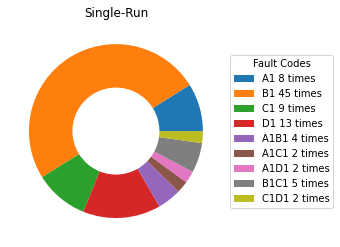

In [57]:
# Remove wedgeprops to make pie
wedges, texts = plt.pie(values, 
                        textprops=dict(color="w"), 
                        wedgeprops=dict(width=0.5))

legend_keys = copy.copy(keys)

for i in range(len(keys)):
     legend_keys[i] = str(legend_keys[i]) + " " + str(values[i]) + " " + "times"
        
plt.legend(wedges, legend_keys,
          title="Fault Codes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Single-Run")
plt.show()
#plt.savefig('single-run pie.png')

### Bar Chat

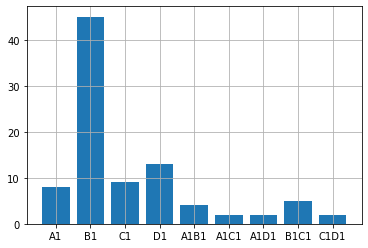

In [56]:
#plt.title('Sensor Fusion')
plt.bar(keys, values)
plt.grid()
#plt.show()
plt.savefig('single-run pie.png')

### Doughnut

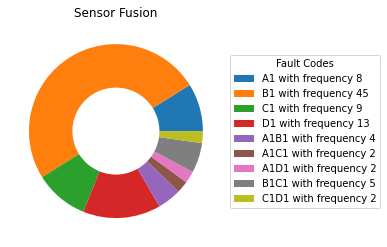

In [54]:
legend_keys = copy.copy(keys)

for i in range(len(keys)):
     legend_keys[i] += " with frequency " + str(values[i])

# Remove wedgeprops to make pie
wedges, texts = plt.pie(values, textprops=dict(color="w"), wedgeprops=dict(width=0.5))
plt.legend(wedges, legend_keys,
          title="Fault Codes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Sensor Fusion")
plt.show()

### Internal Transition

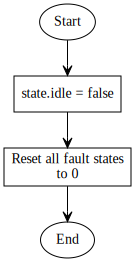

In [55]:
from graphviz import Digraph

dot = Digraph(node_attr={'shape': 'box'}, format='png', filename='internal transition.png', graph_attr = {'splines': 'ortho'})
dot.edge_attr.update(arrowhead='vee', arrowsize='1')

dot.node('S', shape='oval', label='Start')
dot.node('0', label='state.idle = false')
dot.node('1', label='Reset all fault states\nto 0')
dot.node('E', shape='oval', label='End')

dot.edge('S', '0')  
dot.edge('0', '1')
dot.edge('1', 'E')
dot.save()
dot.render(view=False)
dot

### External Transition

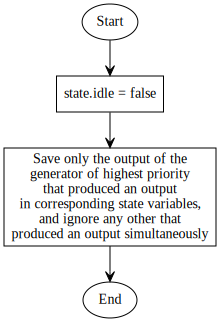

In [26]:
from graphviz import Digraph

dot = Digraph(node_attr={'shape': 'box'}, format='png', filename='external transition.png', graph_attr = {'splines': 'ortho'})
dot.edge_attr.update(arrowhead='vee', arrowsize='1')

dot.node('S', shape='oval', label='Start')
dot.node('0', label='state.idle = false')
dot.node('1', label='Save only the output of the\ngenerator of highest priority\nthat produced an output\nin corresponding state variables,\nand ignore any other that\nproduced an output simultaneously')
dot.node('E', shape='oval', label='End')

dot.edge('S', '0')  
dot.edge('0', '1')
dot.edge('1', 'E')
dot.save()
dot.render(view=False)
dot

### Output

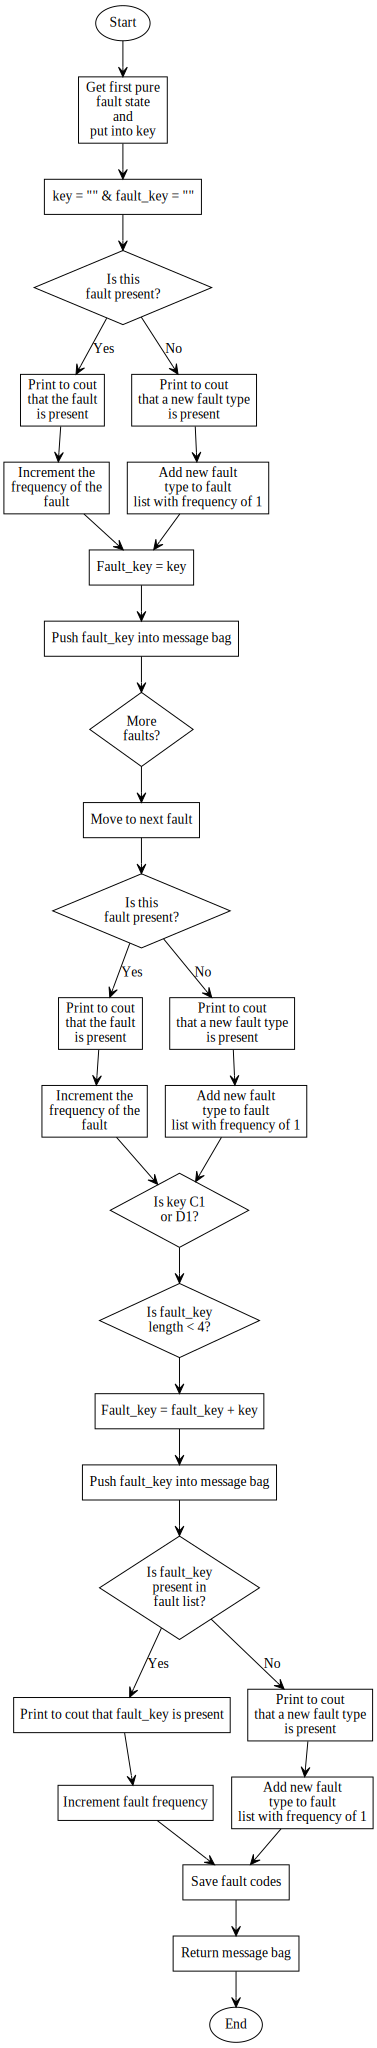

In [44]:
dot = Digraph(node_attr={'shape': 'box'}, format='png', filename='output.png')
dot.edge_attr.update(arrowhead='vee', arrowsize='1')

dot.node('S', shape='oval', label='Start')
dot.node('0', label='Get first pure\nfault state\nand\nput into key')
dot.node('1', label='key = "" & fault_key = ""')
dot.node('2', label='Is this\nfault present?', shape='diamond')
dot.node('3', label='Print to cout\nthat the fault\nis present')
dot.node('4', label='Increment the\nfrequency of the\nfault')
dot.node('5', label='Print to cout\nthat a new fault type\nis present')
dot.node('6', label='Add new fault\ntype to fault\nlist with frequency of 1')
dot.node('7', label='Fault_key = key')
dot.node('8', label='Push fault_key into message bag')
dot.node('9', label='More\nfaults?', shape='diamond')
dot.node('11', label='Move to next fault')
dot.node('12', label='Is this\nfault present?', shape='diamond')
dot.node('13', label='Print to cout\nthat the fault\nis present')
dot.node('14', label='Increment the\nfrequency of the\nfault')
dot.node('15', label='Print to cout\nthat a new fault type\nis present')
dot.node('16', label='Add new fault\ntype to fault\nlist with frequency of 1')
dot.node('17', label='Is key C1\nor D1?', shape='diamond')
dot.node('18', label='Is fault_key\nlength < 4?', shape='diamond')
dot.node('19', label='Fault_key = fault_key + key')
dot.node('20', label='Push fault_key into message bag')

dot.node('21', label='Is fault_key\npresent in\nfault list?', shape='diamond')
dot.node('22', label='Print to cout that fault_key is present')
dot.node('23', label='Increment fault frequency')
dot.node('24', label='Print to cout\nthat a new fault type\nis present')
dot.node('25', label='Add new fault\ntype to fault\nlist with frequency of 1')
dot.node('26', label='Save fault codes')
dot.node('27', label='Return message bag')
dot.node('E', shape='oval', label='End')

dot.edge('S', '0')  
dot.edge('0', '1')
dot.edge('1', '2')
dot.edge('2', '3', 'Yes')
dot.edge('3', '4')
dot.edge('2', '5', 'No')
dot.edge('5', '6')
dot.edge('6', '7')
dot.edge('4', '7')
dot.edge('7', '8')
dot.edge('8', '9')
dot.edge('9', '11')
dot.edge('11', '12')
dot.edge('12', '13', 'Yes')
dot.edge('13', '14')
dot.edge('12', '15', 'No')
dot.edge('15', '16')
dot.edge('14', '17')
dot.edge('16', '17')
dot.edge('17', '18')
dot.edge('18', '19')
dot.edge('19', '20')
dot.edge('20', '21')
dot.edge('21', '22', 'Yes')
dot.edge('22', '23')
dot.edge('21', '24', 'No')
dot.edge('24', '25')
dot.edge('23', '26')
dot.edge('25', '26')
dot.edge('26', '27')
dot.edge('27', 'E')
dot.save()
dot.render(view=False)
dot